<h1 style="color:blue">Project-2 - Par Inc. Golf Data Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [3]:
%matplotlib inline

In [4]:
sample_data = pd.read_excel("golf-data.xls")

In [5]:
sample_data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [6]:
sample_data.tail()

,Current,New
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [7]:
sample_data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [9]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


<h2 style="color:brown"> There are no null values in the samlple.</h2>

In [10]:
current_data = sample_data["Current"]
new_data = sample_data["New"]

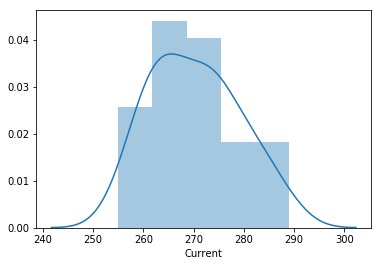

In [12]:
sb.distplot(current_data)

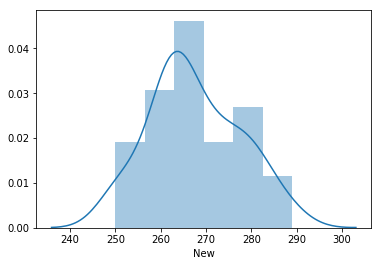

In [13]:
sb.distplot(new_data)

<h2 style="color:brown"> From the distribution plot above, it is visible that both the samples are more or less normally distributed. We will cross validate the same with Shapiro-Wilk Test.</h2>

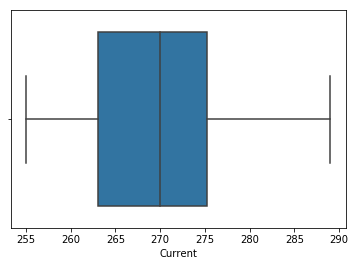

In [14]:
sb.boxplot(x=current_data)

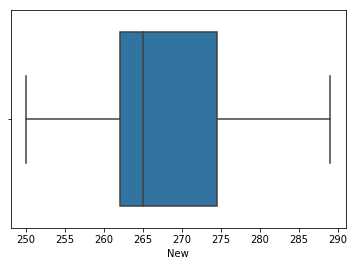

In [15]:
sb.boxplot(x=new_data)

<h2 style="color:brown"> From the box plot above, it is clearly visible that both the samples don't have outliers.</h2>


In [16]:
current_data_mean = np.mean(current_data)
new_data_mean = np.mean(new_data)
current_data_sd =np.std(current_data)
new_data_sd = np.std(new_data)
print("Current Data Mean is -" , current_data_mean)
print("Current Data Std. Deviation is - ",current_data_sd)
print("New Data Mean is -", new_data_mean)
print("New Data Std. Deviation is - ",new_data_sd)

Current Data Mean is - 270.275
Current Data Std. Deviation is -  8.642880017679293
New Data Mean is - 267.5
New Data Std. Deviation is -  9.772410142846033


<h2 style="color:brown">Here, as Population standard deviation can not be made available due to large population, <br/>
using Point Estimate, we can consider sample standard deviation as population standard deviation.<br/>
And using sample size value 40, we can derive standard error of mean (sem) using available sample.</h2>
<h2 style="color:brown">Formula : sigma(xbar) = sigma(sample)/sqrt(sample size)</h2>


In [17]:
print("Standard error of mean for Current Data is = ",stats.sem(current_data))
print("Standard error of mean for New Data is = ",stats.sem(new_data))

Standard error of mean for Current Data is =  1.3839684207898637
Standard error of mean for New Data is =  1.5648379944000428


<h1 style="color:brown"><u>Shapiro-Wilk Test</u></h1>
<h2 style="color:brown">Let us now do a hypothesis test to check the data normality, i.e. whethere the given sample data is Normally Distributed or not.</h2>
<h2 style="color:brown">Null Hypothesis: H<sub>0</sub> = Sample data is drawn from Normal Distribution.</h2>
<h2 style="color:brown">Alternative Hypothesis: H<sub>1</sub> = Sample data is <b>NOT</b> drawn from Normal Distribution.</h2>

In [28]:
#Test on Old Balls Data
w,p = stats.shapiro(current_data)
print("Shapiro Test - Test Statistics: ",w)
print("Shapiro Test - p-value: ",p)

#Setting 95% confidence level
alpha = 0.05

print("Shapiro Test for Current Sample")
if p > alpha:
    print("p > alpha , no statistical evidence to reject Null Hypothesis. Sample Data can be assumed to be drawn from Normal Distribution")
else:
    print("p < alpha, reject Null Hypothesis. Sample Data can not be assumed to be drawn from Normal Distribution")


Shapiro Test - Test Statistics:  0.9707046747207642
Shapiro Test - p-value:  0.378787100315094
Shapiro Test for Current Sample
p > alpha , no statistical evidence to reject Null Hypothesis. Sample Data can be assumed to be drawn from Normal Distribution


In [29]:
#Test on New Balls Data
w,p = stats.shapiro(new_data)
print("Shapiro Test - Test Statistics: ",w)
print("Shapiro Test - p-value: ",p)

#Setting 95% confidence level
alpha = 0.05

print("Shapiro Test for New Sample")
if p > alpha:
    print("p > alpha , no statistical evidence to reject Null Hypothesis. Sample Data can be assumed to be drawn from Normal Distribution")
else:
    print("p < alpha, reject Null Hypothesis. Sample Data can not be assumed to be drawn from Normal Distribution")


Shapiro Test - Test Statistics:  0.9678263664245605
Shapiro Test - p-value:  0.3064655363559723
Shapiro Test for New Sample
p > alpha , no statistical evidence to reject Null Hypothesis. Sample Data can be assumed to be drawn from Normal Distribution


<h1 style="color:brown"><u>Levene Test</u></h1>
<h2 style="color:brown">Let us now do a hypothesis test to check the homegeneity of variance, i.e. whethere the given two samples are having same variance</h2>
<h2 style="color:brown">Null Hypothesis: H<sub>0</sub> = Samples are having same variance. Sigma<sub>1</sub>=Sigma<sub>2</sub></h2>
<h2 style="color:brown">Alternative Hypothesis: H<sub>1</sub> = Samples are <b>NOT</b> having same variance. Sigma<sub>1</sub>!=Sigma<sub>2</sub></h2>

In [20]:
#Considering center = 'mean' here as the samples can be assumed normally distributed
w,p = stats.levene(current_data,new_data,center='mean')
print("Levene Test - Test Statistics: ",w)
print("Levene Test - p-value: ",p)

#Setting 95% confidence level
alpha = 0.05

if p > alpha:
    print("p > alpha , no statistical evidence to reject Null Hypothesis. Homogeneity of Variance can be assumed.")
else:
    print("p < alpha, reject Null Hypothesis. Homogeneity of Variance can not be assumed.")

Levene Test - Test Statistics:  0.4454881721113651
Levene Test - p-value:  0.5064553165908879
p > alpha , no statistical evidence to reject Null Hypothesis. Homogeneity of Variance can be assumed.


<h2 style="color:brown">As we can assumed the homogenity of variance, we can now calculate Pooled Variance/Pooled Standard Deviations using formula - sqrt((SD<sub>1</sub>*SD<sub>1</sub> + SD<sub>2</sub>*SD<sub>2</sub>) / 2)</h2>

In [30]:
psd = np.sqrt(((current_data.std()*current_data.std()) +(new_data.std()*new_data.std()))/2)
print("Pooled Standard Deviation : ",psd)

Pooled Standard Deviation :  9.342469200871404


<h1 style="color:brown"><u>T Test</u></h1>
<h2 style="color:brown">Let us now do a hypothesis test to check the mean equality, i.e. whethere the given two samples are having same mean</h2>
<h2 style="color:brown">Null Hypothesis: H<sub>0</sub> = Samples are having same mean. Mu<sub>1</sub>=Mu<sub>2</sub></h2>
<h2 style="color:brown">Alternative Hypothesis: H<sub>1</sub> = Samples are <b>NOT</b> having same variance. Mu<sub>1</sub>!=Mu<sub>2</sub></h2>

In [21]:
t,p = stats.ttest_ind(current_data,new_data,equal_var=True)
print("TTest - Test Statistics: ",t)
#As its a two tail test, multiplying p-value by 2
print("TTest - p-value: ",p)

#Setting 95% confidence level
alpha = 0.05

#As its a two tail test, multiplying p-value by 2
if p > alpha:
    print("p > alpha , no statistical evidence to reject Null Hypothesis. Samples can be assumed to have same mean mu1=mu2")
else:
    print("p < alpha, reject Null Hypothesis.Samples can be assumed to have same mean mu1=mu2.")

TTest - Test Statistics:  1.3283615935245678
TTest - p-value:  0.18793228491854663
p > alpha , no statistical evidence to reject Null Hypothesis. Samples can be assumed to have same mean mu1=mu2


# Perform Hypothesis Testing through formula

In [22]:
t = (current_data.mean() - new_data.mean())/np.sqrt(((current_data.std()*current_data.std())/40)+((new_data.std()*new_data.std())/40))
print("Test Statistics: " ,t)

Test Statistics:  1.3283615935245674


## Calculate p value

In [25]:
#As Sigma is known, degree of freedom  = n1+n2-2 = 80-2 = 78
p = 1- stats.t.cdf(t,df=78)
#As its two tail test, multiplying p value by 2
p = p*2
print("p-value: ",p)
if p > alpha:
    print("p > alpha , no statistical evidence to reject Null Hypothesis. Samples can be assumed to have same mean mu1=mu2")
else:
    print("p < alpha, reject Null Hypothesis.Samples can be assumed to have same mean mu1=mu2.")

p-value:  0.18793228491854674
p > alpha , no statistical evidence to reject Null Hypothesis. Samples can be assumed to have same mean mu1=mu2


# Calculating Probability of making Type II error as we have failed to reject hypothesis

In [26]:
#Critical value at 0.05 probability is 1.99 and observed value of t statistic is 1.33, Degree of Freedom=n1+n2-2 = 78
beta = stats.t.cdf(1.99-1.33,df=78)
print("Probability of making Type II error Beta is: ",beta)

Probability of making Type II error Beta is:  0.7444009570929244


## Calculating the Power of the Test

In [27]:
print("Power of the Test,",1-beta)

Power of the Test, 0.2555990429070756


# CONCLUSION
## We were unable to reject the Null Hypothesis thus TTest on provided sample suggests no difference in the mean of driving distnace of the Old and New Balls. Par Inc can manufacture the New Balls.
## However, by calculating the probability of making Type II error, we can see that the power of the test is around 25% which is less. So to increase the power and to reduce the chances of making Type II error, this test should be performed on large data set or level of significance  apha should be increased.